# Wine Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('red_wine.csv')

In [3]:
df.head(5)

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


# Profile Report

In [5]:
from pandas_profiling import ProfileReport

C:\Users\arjun\AppData\Local\Temp\ipykernel_23108\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [6]:
profile = ProfileReport(df, title='Red Wine Data Profile Report', explorative=True)

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_file("red-wine-profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

# Use LabelEncoder to transform 'type' column
df['type'] = 1-label_encoder.fit_transform(df['type'])

In [11]:
df.head

<bound method NDFrame.head of      citric acid  sulphates  alcohol  type
0           0.49       0.63      8.0     0
1           0.66       0.57      8.3     0
2           0.23       0.44      8.5     1
3           0.44       0.84      8.6     0
4           0.08       0.50      8.7     0
..           ...        ...      ...   ...
566         0.40       0.70     12.7     0
567         0.28       0.60     12.8     1
568         0.31       0.60     12.8     1
569         0.34       0.72     12.8     0
570         0.35       0.32     12.8     1

[571 rows x 4 columns]>

# Model Performance

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
# Split the data into features (X) and binary target (y)
X = df.drop('type', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df['type']


In [14]:
# Create a list of classifiers to evaluate
classifiers = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM-Linear', SVC(kernel='linear', probability=True)),
    ('SVM-RBF', SVC(kernel='rbf', probability=True)),
    ('Random Forest', RandomForestClassifier())
]

# Define a function to perform cross-validation and calculate performance metrics
def evaluate_classifier(classifier, X, y):
    auc_scores = cross_val_score(classifier, X, y, cv=10, scoring='roc_auc')
    accuracy_scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    return auc_scores.mean(), accuracy_scores.mean()

# Create dictionaries to store the results
auc_results = {}
accuracy_results = {}

# Evaluate each classifier and store the results
for name, classifier in classifiers:
    auc_score, accuracy_score = evaluate_classifier(classifier, X, y)
    auc_results[name] = auc_score
    accuracy_results[name] = accuracy_score

# Add the Baseline model results (use your code from previous questions)
baseline_auc = 0.5  # Random classifier AUC
baseline_accuracy = 1.0 - y.mean()  # Majority class accuracy
auc_results['Baseline'] = baseline_auc
accuracy_results['Baseline'] = baseline_accuracy

# Create DataFrames from the dictionaries
auc_df = pd.DataFrame.from_dict(auc_results, orient='index', columns=['AUC'])
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['Accuracy'])

# Transpose the DataFrames
auc_df = auc_df.T
accuracy_df = accuracy_df.T

# Display the results
result_table = pd.concat([auc_df, accuracy_df])
result_table = result_table.round(2)
result_table

,Baseline,Logistic Regression,Naive Bayes,Decision Tree,SVM-Linear,SVM-RBF,Random Forest
AUC,0.50,0.88,0.90,0.75,0.88,0.87,0.89
Accuracy,0.47,0.78,0.82,0.75,0.79,0.54,0.80


# ROC-AUC for red_wine dataset

<IPython.core.display.Javascript object>


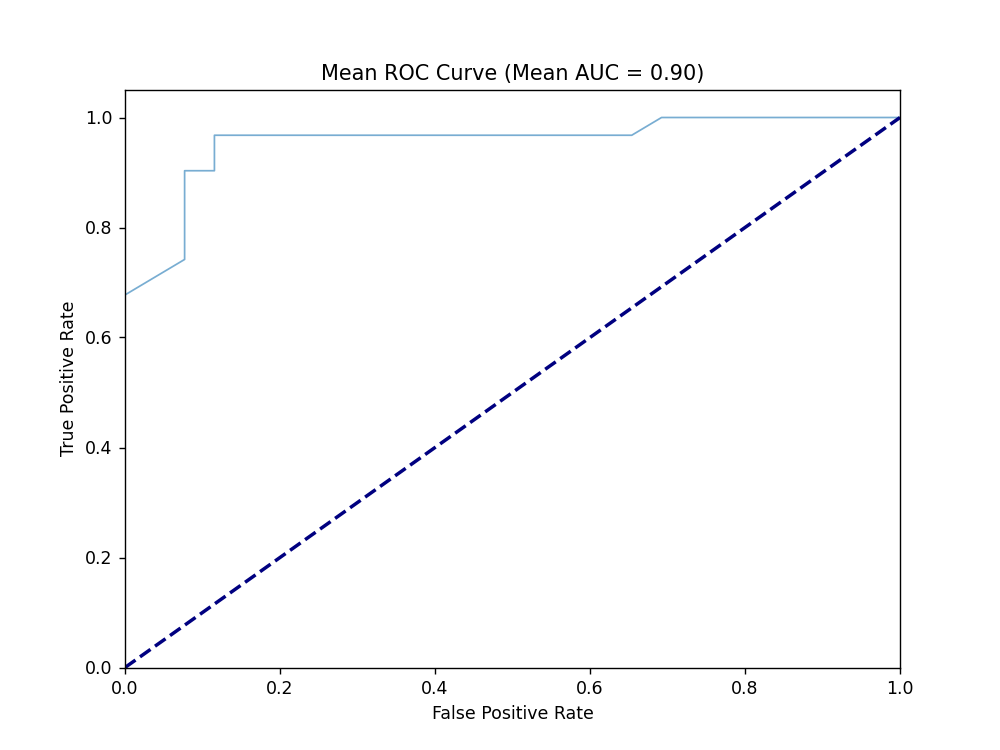

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize lists to store ROC AUC values for each fold
roc_auc_scores = []

# Initialize a Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=10)

# Initialize the figure for plotting
plt.figure(figsize=(8, 6))

# Perform 10-fold cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the Random Forest classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the positive class (low) on the test set
    y_scores = rf_classifier.predict_proba(X_test)[:, 1]

    # Compute the ROC curve for the fold
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Calculate the AUC for the fold
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Plot the ROC curve for the fold
plt.plot(fpr, tpr, lw=1, alpha=0.6)

# Calculate the mean ROC AUC score across all folds
mean_roc_auc = np.mean(roc_auc_scores)

# Plot the mean ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Mean ROC Curve (Mean AUC = {mean_roc_auc:.2f})')
plt.show()



# White_wine dataset

In [16]:
df1=pd.read_csv('white_wine.csv')
df1.head()

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


In [17]:
# Use LabelEncoder to transform 'type' column
df1['type'] = 1-label_encoder.fit_transform(df1['type'])

# AUC

In [18]:
X_white = df1.drop('type', axis=1)
y_white = df1['type']

In [19]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Calculate AUC scores using 10-fold cross-validation
auc_scores_white = cross_val_score(rf_model, X_white, y_white, cv=10, scoring=make_scorer(roc_auc_score))


# Calculate the mean AUC score across all folds
mean_auc_white = auc_scores_white.mean()
print(f'Mean AUC score on white-wine dataset (10-fold CV): {mean_auc_white:.2f}')

Mean AUC score on white-wine dataset (10-fold CV): 0.85


Random Forest classifier has shown excellent performance on both the red and white wine datasets, with AUC scores of 0.90 and 0.85, respectively. These results suggest that the model is well-suited for the classification task and can provide reliable predictions.